# Julia es practicidad

## Notebook 2 - Uso de librerías

In [1]:
using Pkg

In [2]:
pkg"st"

      Status `C:\Users\augus\dev\gh\akielbowicz\scipy-latam-2022-taller-julia\materiales_taller\julia_es_practicidad\Project.toml`
  [336ed68f] CSV v0.10.4
  [8f4d0f93] Conda v1.7.0
  [a93c6f00] DataFrames v1.3.5
  [7073ff75] IJulia v1.23.3
  [f0f68f2c] PlotlyJS v0.18.8
  [91a5bcdd] Plots v1.33.0
  [f3b207a7] StatsPlots v0.15.3


In [3]:
pkg"add DataFrames, StatsPlots"

    Updating registry at `C:\Users\augus\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\augus\dev\gh\akielbowicz\scipy-latam-2022-taller-julia\materiales_taller\julia_es_practicidad\Project.toml`
  No Changes to `C:\Users\augus\dev\gh\akielbowicz\scipy-latam-2022-taller-julia\materiales_taller\julia_es_practicidad\Manifest.toml`


In [4]:
using StatsPlots, DataFrames

In [5]:
DataFrame(iteracion=[1,2,3],valor=[4.0,5.0,6.0])

,iteracion,valor
,Int64,Float64
1,1,4.0
2,2,5.0
3,3,6.0


In [6]:
df = DataFrame( :x=>range(0,10,100), :y=>rand(100));

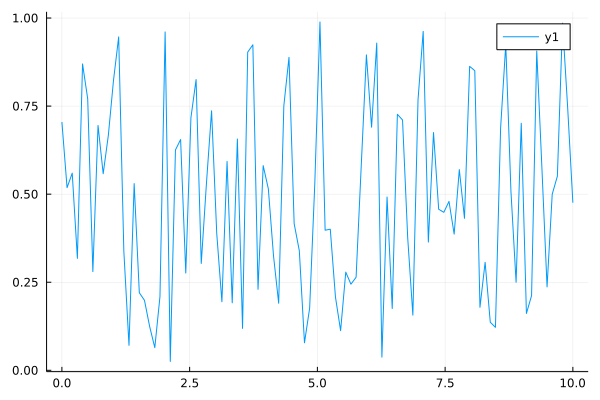

In [7]:
plot(df.x, df.y)

In [8]:
pkg"add CSV"

   Resolving package versions...
  No Changes to `C:\Users\augus\dev\gh\akielbowicz\scipy-latam-2022-taller-julia\materiales_taller\julia_es_practicidad\Project.toml`
  No Changes to `C:\Users\augus\dev\gh\akielbowicz\scipy-latam-2022-taller-julia\materiales_taller\julia_es_practicidad\Manifest.toml`


In [9]:
import CSV

In [10]:
datos = DataFrame(CSV.File("../../artefactos/datos_de_mercado/SPY.csv"))

,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2017-09-25,249.15,249.55,248.08,248.93,228.433,57064400
2,2017-09-26,249.42,249.7,248.81,249.08,228.57,54082000
3,2017-09-27,249.88,250.49,248.87,250.05,229.461,81001400
4,2017-09-28,249.73,250.44,249.63,250.35,229.736,44778800
5,2017-09-29,250.34,251.32,250.13,251.23,230.543,85578000
6,2017-10-02,251.49,252.32,251.29,252.32,231.544,59023000
7,2017-10-03,252.32,252.89,252.23,252.86,232.039,66810200
8,2017-10-04,252.69,253.44,252.56,253.16,232.314,55953600
9,2017-10-05,253.54,254.68,253.2,254.66,233.691,63522800


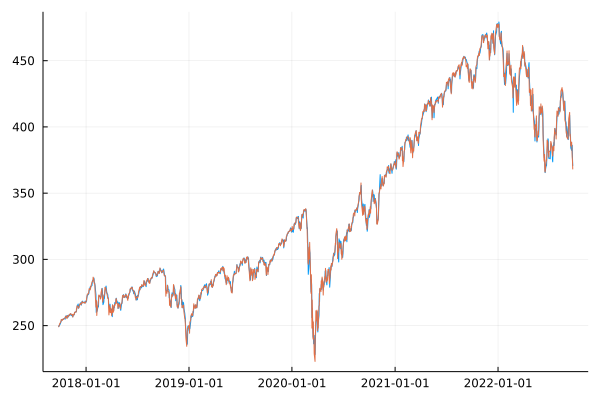

In [17]:
@df datos plot(:Date, [:Open,:Close], legend=false)

In [12]:
diferencia(y) = [missing; diff(y)]

diferencia (generic function with 1 method)

In [13]:
diferencia([1,2,3,4,6])

5-element Vector{Union{Missing, Int64}}:
  missing
 1
 1
 1
 2

In [28]:
retornos(df) = select(dropmissing(transform(df, :Close => diferencia => :Return)), [:Date,:Return])

retornos (generic function with 1 method)

In [31]:
spy = retornos(datos)

,Date,Return
,Date,Float64
1,2017-09-26,0.150009
2,2017-09-27,0.970001
3,2017-09-28,0.300003
4,2017-09-29,0.87999
5,2017-10-02,1.09001
6,2017-10-03,0.539994
7,2017-10-04,0.300003
8,2017-10-05,1.5
9,2017-10-06,-0.290009


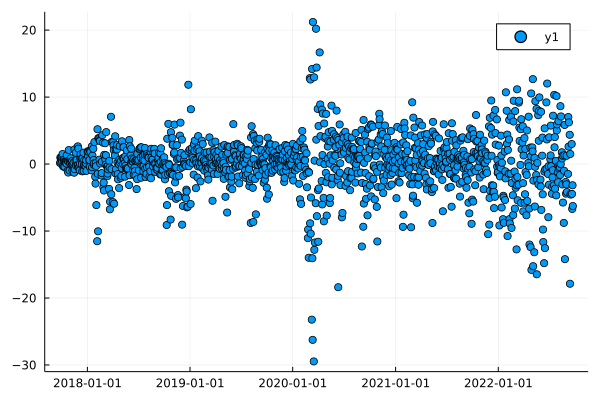

In [32]:
@df spy scatter(:Date,:Return)

In [33]:
msft = retornos(DataFrame(CSV.File("../../artefactos/datos_de_mercado/MSFT.csv")))

,Date,Return
,Date,Float64
1,2017-09-26,0.0
2,2017-09-27,0.589996
3,2017-09-28,0.020005
4,2017-09-29,0.619995
5,2017-10-02,0.120003
6,2017-10-03,-0.349999
7,2017-10-04,0.43
8,2017-10-05,1.28
9,2017-10-06,0.029999


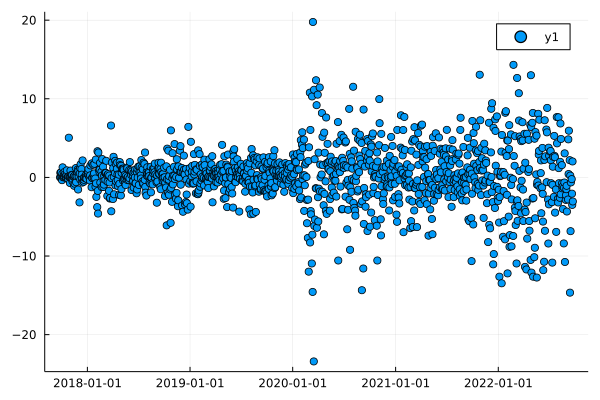

In [34]:
@df msft scatter(:Date,:Return)

In [42]:
meli = retornos(DataFrame(CSV.File("../../artefactos/datos_de_mercado/MELI.csv")))

,Date,Return
,Date,Float64
1,2017-09-26,-0.950012
2,2017-09-27,-1.87
3,2017-09-28,-5.41
4,2017-09-29,-3.06
5,2017-10-02,4.72
6,2017-10-03,0.709991
7,2017-10-04,-0.549987
8,2017-10-05,6.42001
9,2017-10-06,-1.41


In [62]:
dfs = [msft,spy, meli]

3-element Vector{DataFrame}:
 1258×2 DataFrame
  Row │ Date        Return     
      │ Date        Float64    
──────┼────────────────────────
    1 │ 2017-09-26    0.0
    2 │ 2017-09-27    0.589996
    3 │ 2017-09-28    0.020005
    4 │ 2017-09-29    0.619995
    5 │ 2017-10-02    0.120003
    6 │ 2017-10-03   -0.349999
    7 │ 2017-10-04    0.43
    8 │ 2017-10-05    1.28
    9 │ 2017-10-06    0.029999
   10 │ 2017-10-09    0.290001
   11 │ 2017-10-10    0.0
  ⋮   │     ⋮           ⋮
 1249 │ 2022-09-12    2.19
 1250 │ 2022-09-13  -14.66
 1251 │ 2022-09-14    0.229996
 1252 │ 2022-09-15   -6.84
 1253 │ 2022-09-16   -0.64
 1254 │ 2022-09-19   -0.220001
 1255 │ 2022-09-20   -2.07001
 1256 │ 2022-09-21   -3.5
 1257 │ 2022-09-22    2.03
 1258 │ 2022-09-23   -3.06
              1237 rows omitted
 1258×2 DataFrame
  Row │ Date        Return     
      │ Date        Float64    
──────┼────────────────────────
    1 │ 2017-09-26    0.150009
    2 │ 2017-09-27    0.970001
    3 │ 2017-09-28  

In [64]:
nombre = ["msft","spy", "meli"]

3-element Vector{String}:
 "msft"
 "spy"
 "meli"

In [83]:
function new_name(x) 
    if startswith(x,"Return")
         s = split(x,'_')
         i=length(s) > 1 ? parse(Int,s[2])+1 : 1
         nombre[i]
    else
        x
    end
end

new_name (generic function with 1 method)

In [87]:
out = outerjoin(dfs...; on=:Date, makeunique=true);

In [84]:
map(new_name, names(out))

4-element Vector{String}:
 "Date"
 "msft"
 "spy"
 "meli"

In [88]:
returns=rename(new_name,outerjoin(dfs...; on=:Date, makeunique=true))

,Date,msft,spy,meli
,Date,Float64?,Float64?,Float64?
1,2017-09-26,0.0,0.150009,-0.950012
2,2017-09-27,0.589996,0.970001,-1.87
3,2017-09-28,0.020005,0.300003,-5.41
4,2017-09-29,0.619995,0.87999,-3.06
5,2017-10-02,0.120003,1.09001,4.72
6,2017-10-03,-0.349999,0.539994,0.709991
7,2017-10-04,0.43,0.300003,-0.549987
8,2017-10-05,1.28,1.5,6.42001
9,2017-10-06,0.029999,-0.290009,-1.41


In [90]:
# ?outerjoin

In [58]:
using Dates

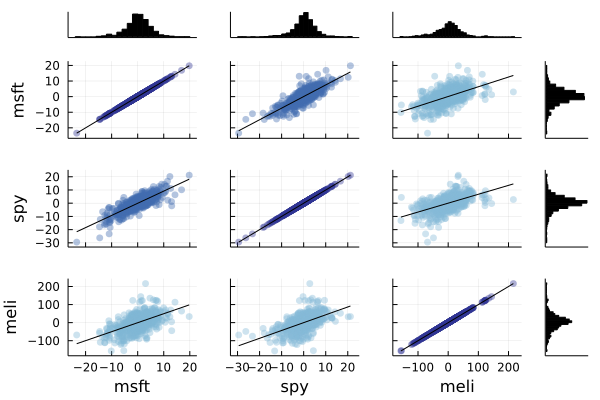

In [99]:
@df filter(:Date=> d-> d> Date("2020-01-01"), returns) cornerplot(cols(2:4))

In [100]:
using LinearAlgebra

In [115]:
s = returns.spy\hcat(returns.meli, returns.msft, ones(size(returns,1)))

1×3 adjoint(::Vector{Union{Missing, Float64}}) with eltype Union{Missing, Float64}:
 4.0381  0.714039  0.00524878

In [117]:
s=s'

3-element Vector{Union{Missing, Float64}}:
 4.038102144082694
 0.7140390252063745
 0.005248783118299274

In [113]:
using Markdown

In [123]:
md"`SPY` = $(s[1]) `MELI` + $(s[2]) `MSFT` + $(s[3])"

`SPY` = 4.038102144082694 `MELI` + 0.7140390252063745 `MSFT` + 0.005248783118299274


In [132]:
Markdown.MD(Markdown.LaTeX("SPY = $(s[1]) MELI + $(s[2]) MSFT + $(s[3])"))

$$
SPY = 4.038102144082694 MELI + 0.7140390252063745 MSFT + 0.005248783118299274
$$
